In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# Fungsi untuk membaca data dari file
def read_emg_data(file_path):
    data = pd.read_csv(file_path, sep="\t", header=None)
    return data

# Fungsi untuk menerapkan filter Butterworth
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [2]:

# Load dataset
jumping_data = read_emg_data("Jumping.txt")
walking_data = read_emg_data("Walking.txt")
bowing_data = read_emg_data("Bowing.txt")

In [3]:
# Asumsikan kolom 0 adalah sinyal target (disesuaikan dengan dataset Anda)
emg_signal = walking_data[0]

# Parameter filter
sampling_rate = 1000  # Frekuensi sampling (asumsi, sesuaikan dengan data Anda)
cutoff_freq = 10  # Frekuensi cutoff untuk lowpass filter
filtered_signal = butter_lowpass_filter(emg_signal, cutoff_freq, sampling_rate)

# Deteksi puncak untuk mendeteksi jumping
peaks, _ = find_peaks(filtered_signal, height=500)  # Adjust height as needed
peak_count = len(peaks)


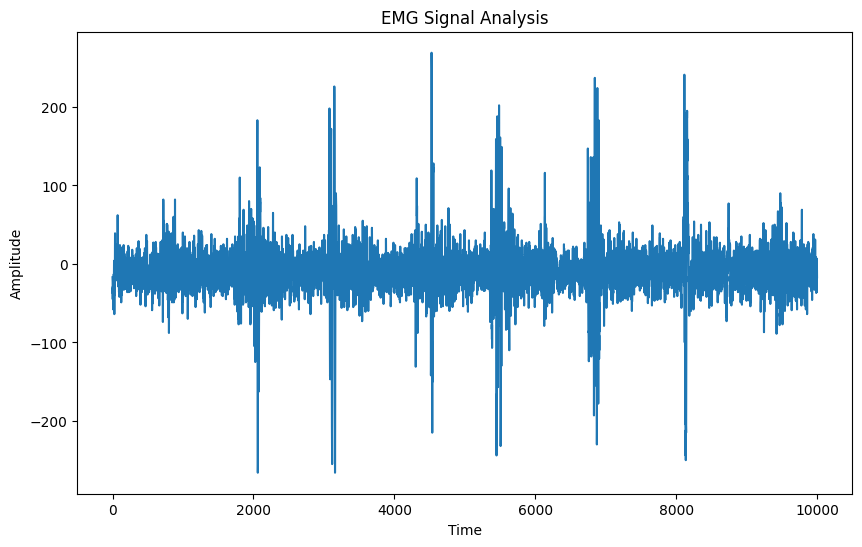

Jumlah jumping terdeteksi: 0


In [4]:

# Visualisasi sinyal
plt.figure(figsize=(10, 6))
plt.plot(emg_signal, label='Original Signal')
# plt.plot(filtered_signal, label='Filtered Signal', alpha=0.7)
# plt.scatter(peaks, filtered_signal[peaks], color='red', label='Detected Peaks')
plt.title('EMG Signal Analysis')
plt.xlabel('Time')
plt.ylabel('Amplitude')
# plt.legend()
plt.show()

print(f"Jumlah jumping terdeteksi: {peak_count}")


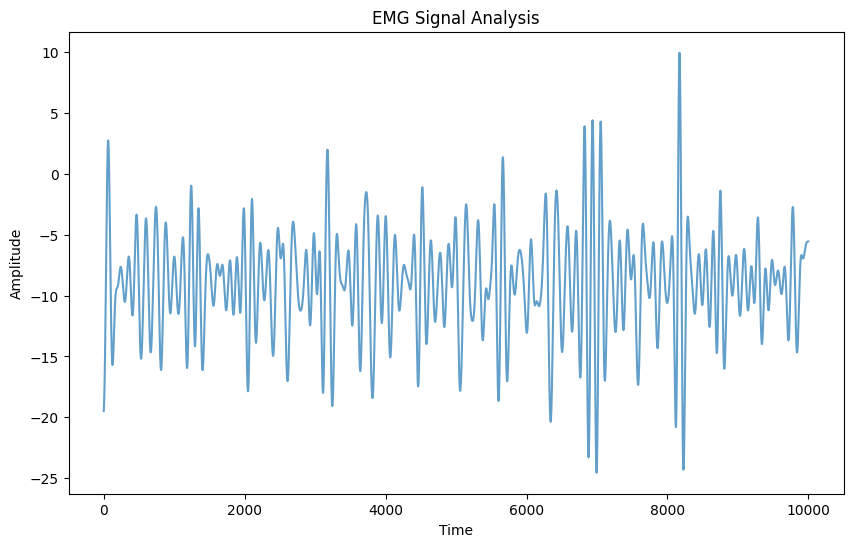

Jumlah jumping terdeteksi: 0


In [5]:

# Visualisasi sinyal
plt.figure(figsize=(10, 6))
# plt.plot(emg_signal, label='Original Signal')
plt.plot(filtered_signal, label='Filtered Signal', alpha=0.7)
# plt.scatter(peaks, filtered_signal[peaks], color='red', label='Detected Peaks')
plt.title('EMG Signal Analysis')
plt.xlabel('Time')
plt.ylabel('Amplitude')
# plt.legend()
plt.show()

print(f"Jumlah jumping terdeteksi: {peak_count}")


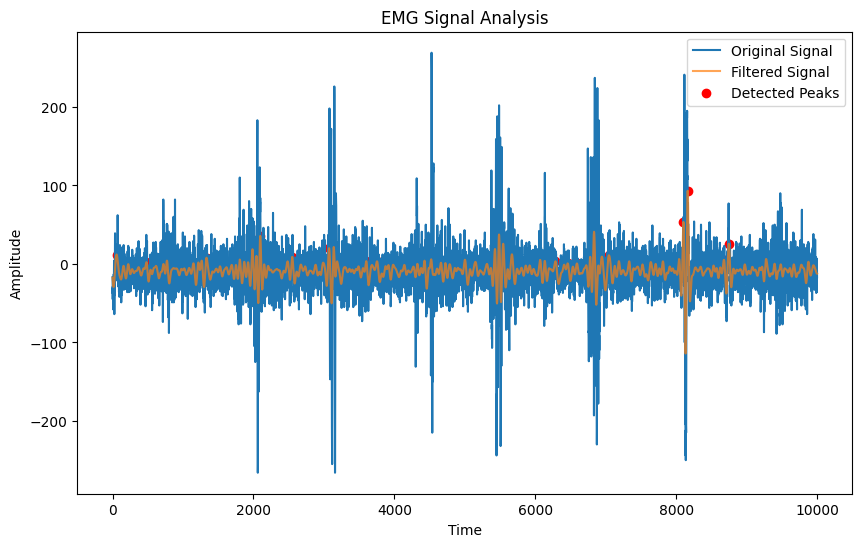

Jumlah jumping terdeteksi: 49


In [6]:
import numpy as np
from scipy.signal import butter, filtfilt, find_peaks
import matplotlib.pyplot as plt

# Fungsi untuk lowpass filter
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs  # Frekuensi Nyquist
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered = filtfilt(b, a, data)
    return filtered

# Asumsikan kolom 0 adalah sinyal target (sesuaikan dengan dataset Anda)
# Jika sinyal berada di dalam DataFrame, pastikan untuk menyesuaikan akses ke data tersebut
# emg_signal = walking_data[0]  # Contoh untuk NumPy array
# emg_signal = emg_signal  # Ganti ini dengan data asli Anda

# Parameter filter
sampling_rate = 1000  # Frekuensi sampling (asumsi, sesuaikan dengan data Anda)
cutoff_freq = 20  # Frekuensi cutoff untuk lowpass filter (sesuaikan jika perlu)
filtered_signal = butter_lowpass_filter(emg_signal, cutoff_freq, sampling_rate)

# Deteksi puncak untuk mendeteksi jumping
# Sesuaikan parameter 'height' berdasarkan range sinyal Anda
peaks, properties = find_peaks(filtered_signal, height=0.5, distance=50)  # Adjust 'height' and 'distance'

# Hitung jumlah puncak
peak_count = len(peaks)

# Visualisasi sinyal
plt.figure(figsize=(10, 6))
plt.plot(emg_signal, label='Original Signal')
plt.plot(filtered_signal, label='Filtered Signal', alpha=0.7)
plt.scatter(peaks, filtered_signal[peaks], color='red', label='Detected Peaks')
plt.title('EMG Signal Analysis')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

print(f"Jumlah jumping terdeteksi: {peak_count}")


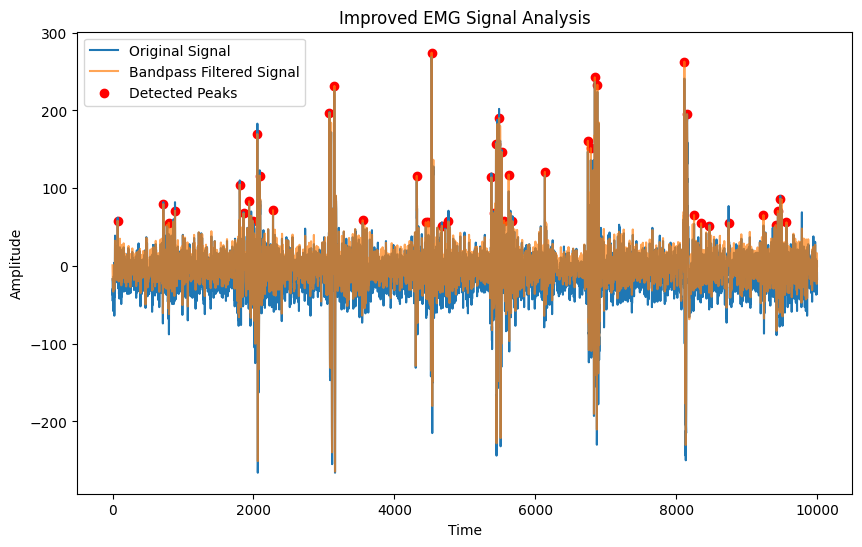

Jumlah jumping terdeteksi: 44


In [7]:
# Fungsi untuk bandpass filter (opsional)
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered = filtfilt(b, a, data)
    return filtered

# Terapkan bandpass filter untuk menghilangkan noise frekuensi rendah dan tinggi
lowcut = 10   # Frekuensi rendah cutoff
highcut = 250  # Frekuensi tinggi cutoff
bandpass_filtered_signal = butter_bandpass_filter(emg_signal, lowcut, highcut, sampling_rate)

# Deteksi puncak dengan parameter yang lebih fleksibel
peaks, properties = find_peaks(
    bandpass_filtered_signal, 
    height=50,   # Kurangi nilai height
    prominence=10,  # Tambahkan parameter prominence
    distance=30   # Sesuaikan jarak antar-puncak
)

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot(emg_signal, label='Original Signal')
plt.plot(bandpass_filtered_signal, label='Bandpass Filtered Signal', alpha=0.7)
plt.scatter(peaks, bandpass_filtered_signal[peaks], color='red', label='Detected Peaks')
plt.title('Improved EMG Signal Analysis')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

print(f"Jumlah jumping terdeteksi: {len(peaks)}")


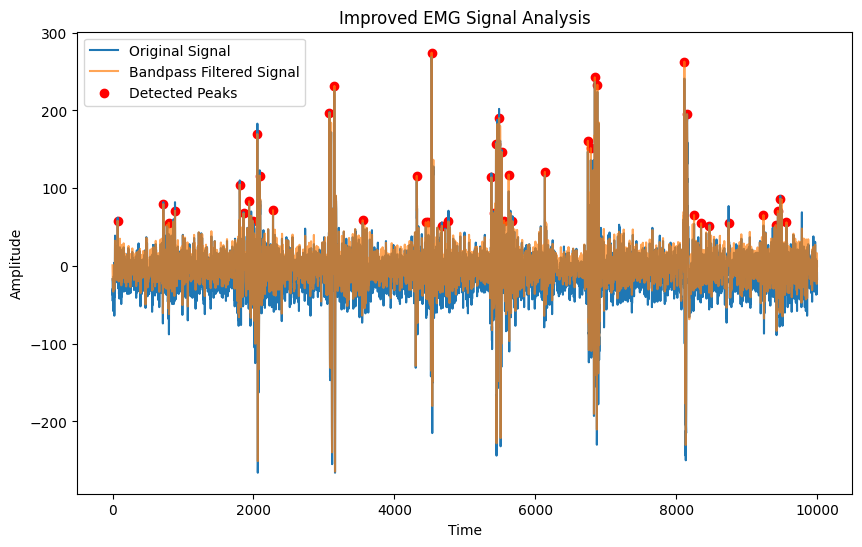

Jumlah jumping terdeteksi: 44


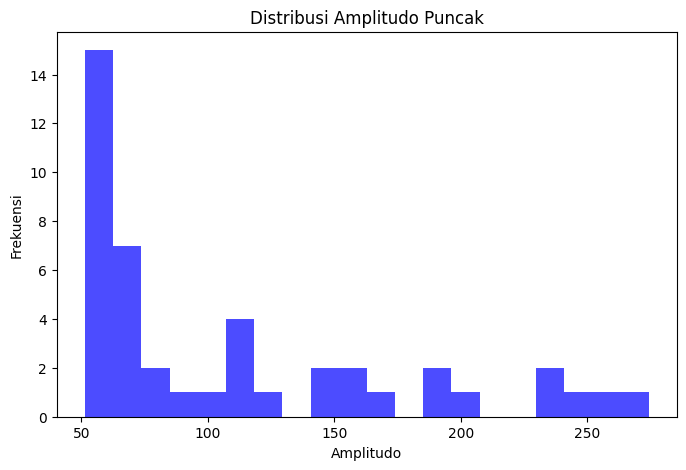

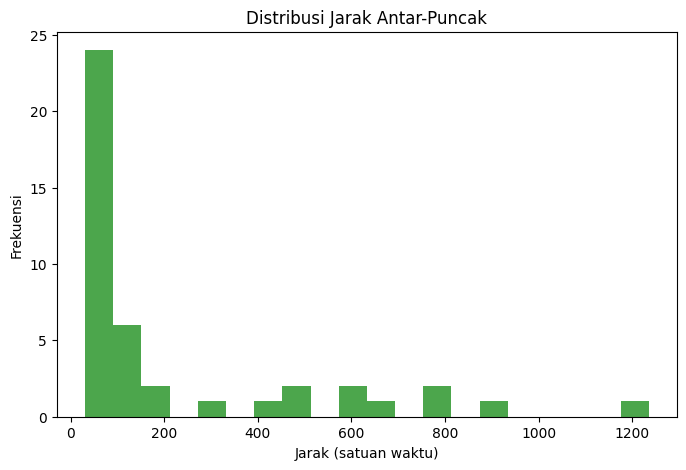

Statistik Amplitudo Puncak:
Rata-rata: 110.65605578564896
Median: 75.56335674305555
Standar Deviasi: 65.52775309083208

Statistik Interval Antar-Puncak:
Rata-rata: 220.74418604651163
Median: 79.0
Standar Deviasi: 288.3891180270686


In [8]:
import numpy as np
from scipy.signal import butter, filtfilt, find_peaks
import matplotlib.pyplot as plt

# Fungsi untuk bandpass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered = filtfilt(b, a, data)
    return filtered

# Contoh sinyal EMG (ganti dengan sinyal asli Anda)
# emg_signal = np.random.randn(10000)  # Ganti ini dengan data asli Anda

# Parameter filter
sampling_rate = 1000  # Frekuensi sampling
lowcut = 10           # Frekuensi rendah cutoff
highcut = 250         # Frekuensi tinggi cutoff

# Terapkan bandpass filter
filtered_signal = butter_bandpass_filter(emg_signal, lowcut, highcut, sampling_rate)

# Deteksi puncak
peaks, properties = find_peaks(
    filtered_signal, 
    height=50,        # Threshold minimum untuk amplitudo puncak
    prominence=10,    # Prominence minimum puncak
    distance=30       # Jarak minimum antar-puncak
)

# Hitung jumlah puncak
peak_count = len(peaks)

# Visualisasi sinyal dan puncak
plt.figure(figsize=(10, 6))
plt.plot(emg_signal, label='Original Signal')
plt.plot(filtered_signal, label='Bandpass Filtered Signal', alpha=0.7)
plt.scatter(peaks, filtered_signal[peaks], color='red', label='Detected Peaks')
plt.title('Improved EMG Signal Analysis')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

print(f"Jumlah jumping terdeteksi: {peak_count}")

# Histogram amplitudo puncak
plt.figure(figsize=(8, 5))
plt.hist(properties['peak_heights'], bins=20, color='blue', alpha=0.7)
plt.title('Distribusi Amplitudo Puncak')
plt.xlabel('Amplitudo')
plt.ylabel('Frekuensi')
plt.show()

# Analisis jarak antar-puncak
intervals = np.diff(peaks)
plt.figure(figsize=(8, 5))
plt.hist(intervals, bins=20, color='green', alpha=0.7)
plt.title('Distribusi Jarak Antar-Puncak')
plt.xlabel('Jarak (satuan waktu)')
plt.ylabel('Frekuensi')
plt.show()

# Statistik amplitudo puncak
print("Statistik Amplitudo Puncak:")
print(f"Rata-rata: {np.mean(properties['peak_heights'])}")
print(f"Median: {np.median(properties['peak_heights'])}")
print(f"Standar Deviasi: {np.std(properties['peak_heights'])}")

# Statistik interval antar-puncak
print("\nStatistik Interval Antar-Puncak:")
print(f"Rata-rata: {np.mean(intervals)}")
print(f"Median: {np.median(intervals)}")
print(f"Standar Deviasi: {np.std(intervals)}")


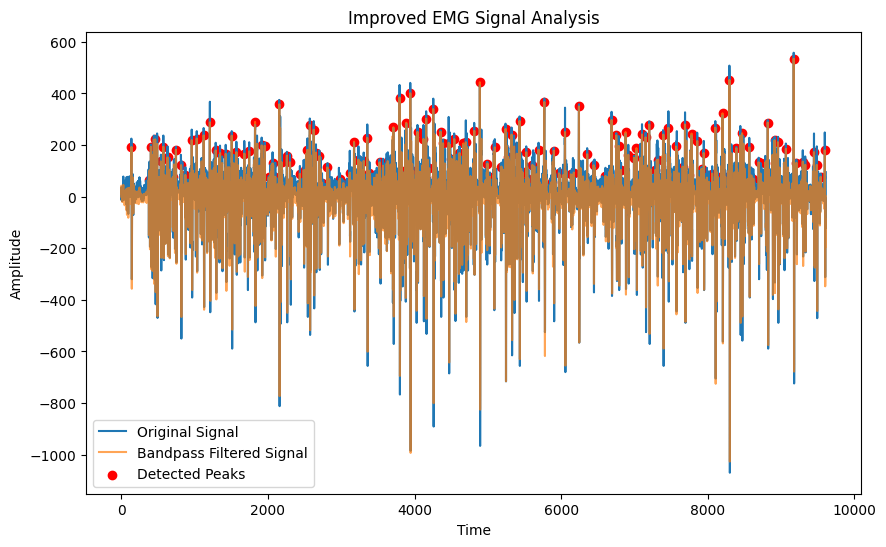

Jumlah jumping terdeteksi: 182


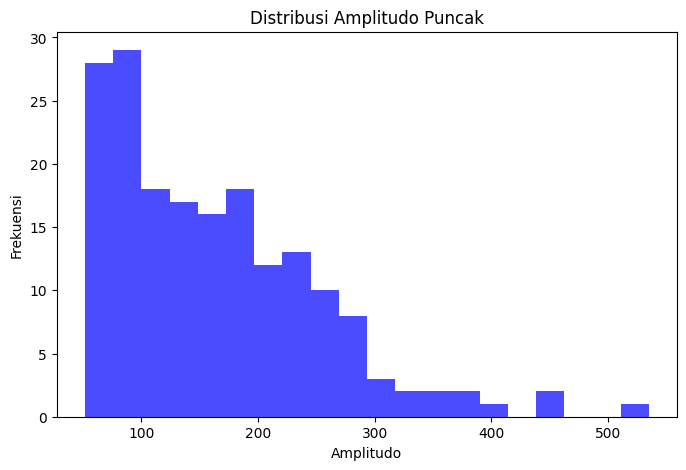

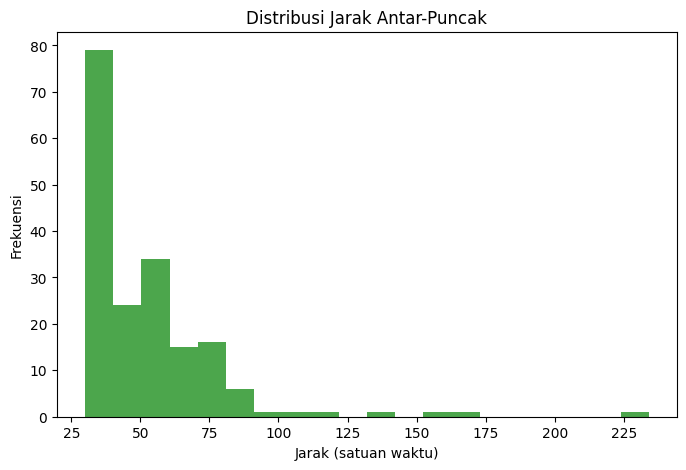

Statistik Amplitudo Puncak:
Rata-rata: 163.55770062364718
Median: 145.51133889171064
Standar Deviasi: 89.25725068701266

Statistik Interval Antar-Puncak:
Rata-rata: 52.248618784530386
Median: 46.0
Standar Deviasi: 25.676032222462428

Fitur yang Diekstraksi:
   mean_amplitude  median_amplitude  std_amplitude  peak_count  mean_interval  \
0      163.557701        145.511339      89.257251         182      52.248619   

   median_interval  std_interval  
0             46.0     25.676032  


In [15]:
import numpy as np
from scipy.signal import butter, filtfilt, find_peaks
import matplotlib.pyplot as plt
import pandas as pd

# Fungsi untuk bandpass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered = filtfilt(b, a, data)
    return filtered

# Fungsi untuk mengekstrak fitur
def extract_features(peaks, properties, signal):
    intervals = np.diff(peaks)
    features = {
        'mean_amplitude': np.mean(properties['peak_heights']),
        'median_amplitude': np.median(properties['peak_heights']),
        'std_amplitude': np.std(properties['peak_heights']),
        'peak_count': len(peaks),
        'mean_interval': np.mean(intervals) if len(intervals) > 0 else 0,
        'median_interval': np.median(intervals) if len(intervals) > 0 else 0,
        'std_interval': np.std(intervals) if len(intervals) > 0 else 0
    }
    return features

# Contoh sinyal EMG (ganti dengan sinyal asli Anda)
walking_data = read_emg_data("Handshaking.txt")
emg_signal = walking_data[5]
# np.random.seed(42)
# emg_signal = np.random.randn(10000) * 50  # Ganti ini dengan data asli Anda

# Parameter filter
sampling_rate = 1000  # Frekuensi sampling
lowcut = 10           # Frekuensi rendah cutoff
highcut = 250         # Frekuensi tinggi cutoff

# Preprocessing: Bandpass filter
filtered_signal = butter_bandpass_filter(emg_signal, lowcut, highcut, sampling_rate)

# Deteksi puncak
peaks, properties = find_peaks(
    filtered_signal, 
    height=50,        # Threshold minimum untuk amplitudo puncak
    prominence=10,    # Prominence minimum puncak
    distance=30       # Jarak minimum antar-puncak
)

# Statistik amplitudo dan jarak antar-puncak
features = extract_features(peaks, properties, filtered_signal)

# Visualisasi sinyal dan puncak
plt.figure(figsize=(10, 6))
plt.plot(emg_signal, label='Original Signal')
plt.plot(filtered_signal, label='Bandpass Filtered Signal', alpha=0.7)
plt.scatter(peaks, filtered_signal[peaks], color='red', label='Detected Peaks')
plt.title('Improved EMG Signal Analysis')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

print(f"Jumlah jumping terdeteksi: {features['peak_count']}")

# Histogram amplitudo puncak
plt.figure(figsize=(8, 5))
plt.hist(properties['peak_heights'], bins=20, color='blue', alpha=0.7)
plt.title('Distribusi Amplitudo Puncak')
plt.xlabel('Amplitudo')
plt.ylabel('Frekuensi')
plt.show()

# Analisis jarak antar-puncak
intervals = np.diff(peaks)
plt.figure(figsize=(8, 5))
plt.hist(intervals, bins=20, color='green', alpha=0.7)
plt.title('Distribusi Jarak Antar-Puncak')
plt.xlabel('Jarak (satuan waktu)')
plt.ylabel('Frekuensi')
plt.show()

# Statistik amplitudo puncak
print("Statistik Amplitudo Puncak:")
print(f"Rata-rata: {features['mean_amplitude']}")
print(f"Median: {features['median_amplitude']}")
print(f"Standar Deviasi: {features['std_amplitude']}")

# Statistik interval antar-puncak
print("\nStatistik Interval Antar-Puncak:")
print(f"Rata-rata: {features['mean_interval']}")
print(f"Median: {features['median_interval']}")
print(f"Standar Deviasi: {features['std_interval']}")

# Simpan fitur ke dalam DataFrame untuk analisis lebih lanjut
features_df = pd.DataFrame([features])
print("\nFitur yang Diekstraksi:")
print(features_df)

# Jika ingin menyimpan fitur untuk model machine learning
features_df.to_csv('emg_features.csv', index=False)
